# Exploration 
In this notebook we explore how to plot the distances metric, by selecting the Ghent region.

In [16]:
import os
import geoplot as gplt
import geopandas as gpd

from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

In [17]:
regions=gpd.read_file("data/NUTS_regions/NUTS_RG_01M_2021_4326.geojson")
gent_cycle_network = gpd.read_file("data\cycle_networks\BE\Arr._Gent-cycle_network.gpkg")
railways = gpd.read_file("data/TEN-T/railways_GL2017_EU_UK.shp")

<Axes: >

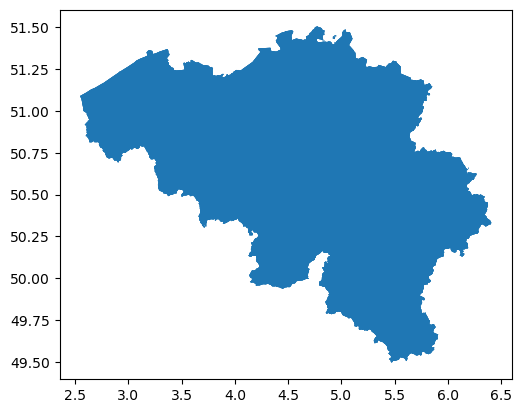

In [18]:
data_BE=regions.loc[regions['CNTR_CODE']=='BE']
data_BE.plot()

## Coordinate reference system (CRS)

We explore and set the CRS to epsg=4326 for all data.

In [19]:
gent_cycle_network.crs

<Geographic 2D CRS: GEOGCS["Undefined geographic SRS",DATUM["unknown", ...>
Name: Undefined geographic SRS
Axis Info [ellipsoidal]:
- lat[north]: Latitude (degree)
- lon[east]: Longitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [20]:
railways.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Conversion to EPSG 4326

In [21]:
railways=railways.to_crs(epsg=4326)
gent_cycle_network = gent_cycle_network.to_crs(epsg=4326)

## Cycling plot

We plot the cycling network in Ghent region.


<Axes: >

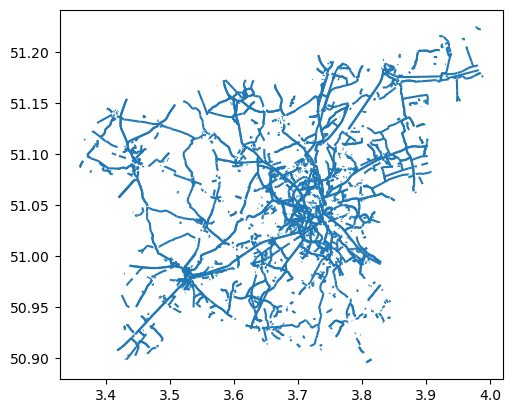

In [22]:
gent_cycle_network.plot()

## Exploring the data

We select Belgium and Flanders area.

In [23]:
region_BE=regions.loc[regions['CNTR_CODE']=="BE"]
region_BE.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
7,BE,BE,0,BE,Belgique/België,Belgique/België,0.0,0,0,BE,"MULTIPOLYGON (((5.10218 51.42900, 5.07104 51.3..."
34,BE3,BE3,1,BE,Région wallonne,Région wallonne,0.0,0,0,BE3,"MULTIPOLYGON (((5.68200 50.75745, 5.68973 50.7..."
56,BE2,BE2,1,BE,Vlaams Gewest,Vlaams Gewest,0.0,0,0,BE2,"MULTIPOLYGON (((5.89207 50.75524, 5.89101 50.7..."
110,BE1,BE1,1,BE,Région de Bruxelles-Capitale/Brussels Hoofdste...,Région de Bruxelles-Capitale/Brussels Hoofdste...,0.0,0,0,BE1,"POLYGON ((4.47678 50.82038, 4.45482 50.81843, ..."
130,BE34,BE34,2,BE,Prov. Luxembourg (BE),Prov. Luxembourg (BE),0.0,0,0,BE34,"POLYGON ((5.67584 50.36852, 5.67324 50.36639, ..."


Selecting East-Flanders for map projection

In [24]:
region_VL=region_BE.loc[region_BE['NAME_LATN']=="Prov. Oost-Vlaanderen"]
region_VL

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
202,BE23,BE23,2,BE,Prov. Oost-Vlaanderen,Prov. Oost-Vlaanderen,0.0,0,0,BE23,"POLYGON ((4.30783 51.12503, 4.28580 51.12382, ..."


## Calculate and plot crossings

We now plot the intersections that we calculated for Ghent region.

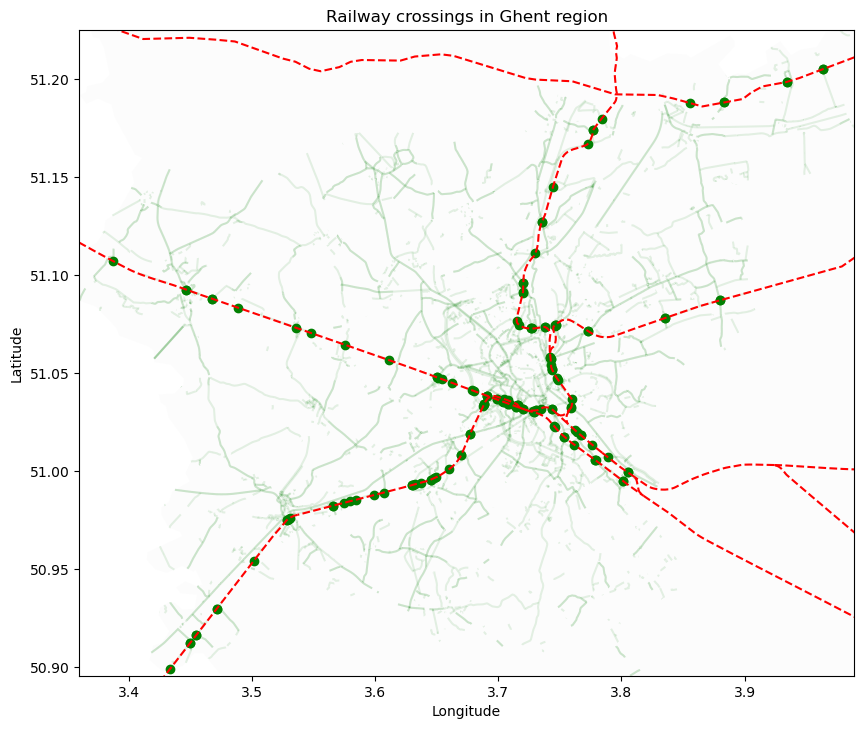

In [25]:
import matplotlib.pyplot as plt
rr_crossings=gpd.read_file("data/railway_crossings_gent.dpkg")
 
fig, ax = plt.subplots(figsize=(10,10))
bounds=gent_cycle_network.total_bounds
# Plot the existing map data
gent_cycle_network.plot(ax=ax, alpha=0.1, color="green", linewidth=1.5)
railways.plot(ax=ax, color="red",linestyle='dashed')
rr_crossings.plot(ax=ax, color="green")
region_VL.plot(ax=ax,alpha=0.02,color="gray") 

ax.set_title('Railway crossings in Ghent region')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
fig.show()

## Coloring in function of distance to a coordinate

Here we experiment with coloring the map in function to the distance to the centre of Ghent

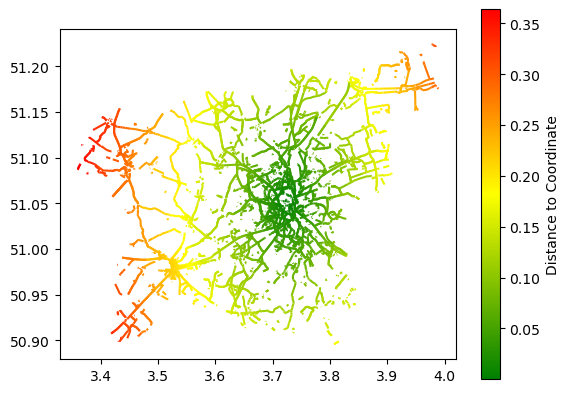

In [26]:

coordinate = Point(3.725652, 51.052616)

# Define a function to calculate the distance from a line to a point
def line_distance(line, point):
    return line.distance(point)

# Calculate the distance from each line to the coordinate
distances = gent_cycle_network.geometry.apply(lambda line: line_distance(line, coordinate))

# Map the distances to a color scale
cmap = LinearSegmentedColormap.from_list('distance', ['green', 'yellow', 'red'])
norm = plt.Normalize(vmin=distances.min(), vmax=distances.max())
colors = [cmap(norm(distance)) for distance in distances]

# Plot the GeoDataFrame using the colors
ax = gent_cycle_network.plot(color=colors)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Distance to Coordinate')

# Show the plot
plt.show()

## Plotting crossing points 

We now can plot the value of the distance between neighbouring crossing points

In [27]:
rr_crossings=rr_crossings.explode()
coords = [point.coords[0] for point in rr_crossings.geometry]

149


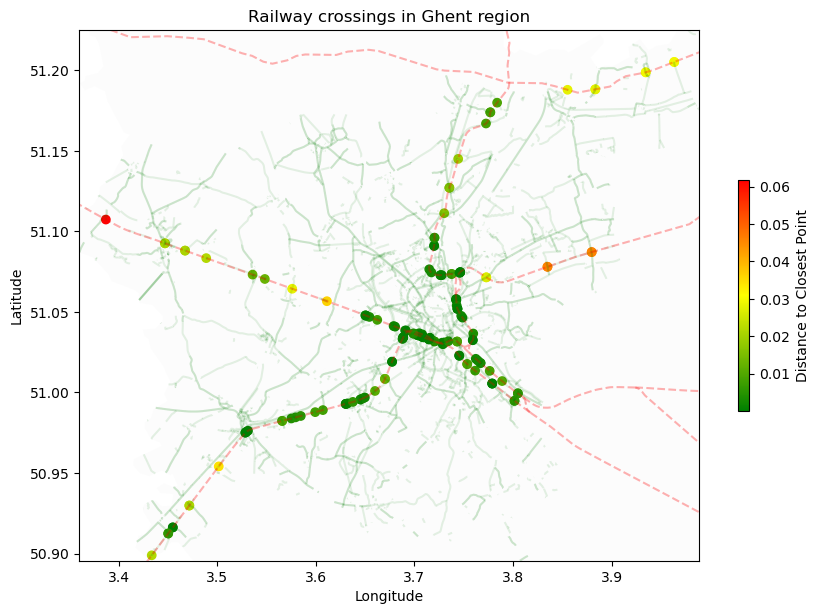

In [28]:
rr_crossings=gpd.read_file("data/railway_crossings_gent.dpkg")

rr_crossings=rr_crossings.explode()
coords = [point.coords[0] for point in rr_crossings.geometry]

points = [Point(x, y) for x, y in coords]

# Define a function to calculate the distance from a line to the closest point in a list of points
def line_min_distance(line, points):
    distances = [line.distance(point) for point in points]
    distances = [distance for distance in distances if distance != 0] # Exclude distance to self
    return min(distances)

# Calculate the distance from each line to the closest point
distances = rr_crossings.geometry.apply(lambda line: line_min_distance(line, points))
print (len(distances))
# Map the distances to a color scale
cmap = LinearSegmentedColormap.from_list('distance', ['green', 'yellow', 'red'])
norm = plt.Normalize(vmin=distances.min(), vmax=distances.max())
colors = [cmap(norm(distance)) for distance in distances]

# Plot the GeoDataFrame using the colors
fig, ax = plt.subplots(figsize=(10,10))
bounds = gent_cycle_network.total_bounds
ax = rr_crossings.plot(color=colors, ax=ax)
region_VL.plot(ax=ax,alpha=0.02,color="gray") 
gent_cycle_network.plot(ax=ax, alpha=0.1, color="green", linewidth=1.5)
railways.plot(ax=ax, color="red",linestyle='dashed', alpha=0.3)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, shrink=0.3)
cbar.set_label('Distance to Closest Point')

# Set labels and limits

ax.set_title('Railway crossings in Ghent region')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Show the plot
plt.show()


# Plotting the infrastructure in color regions

This function is not completed. It is an attempt to plot the infrastructure regions in their according color value.

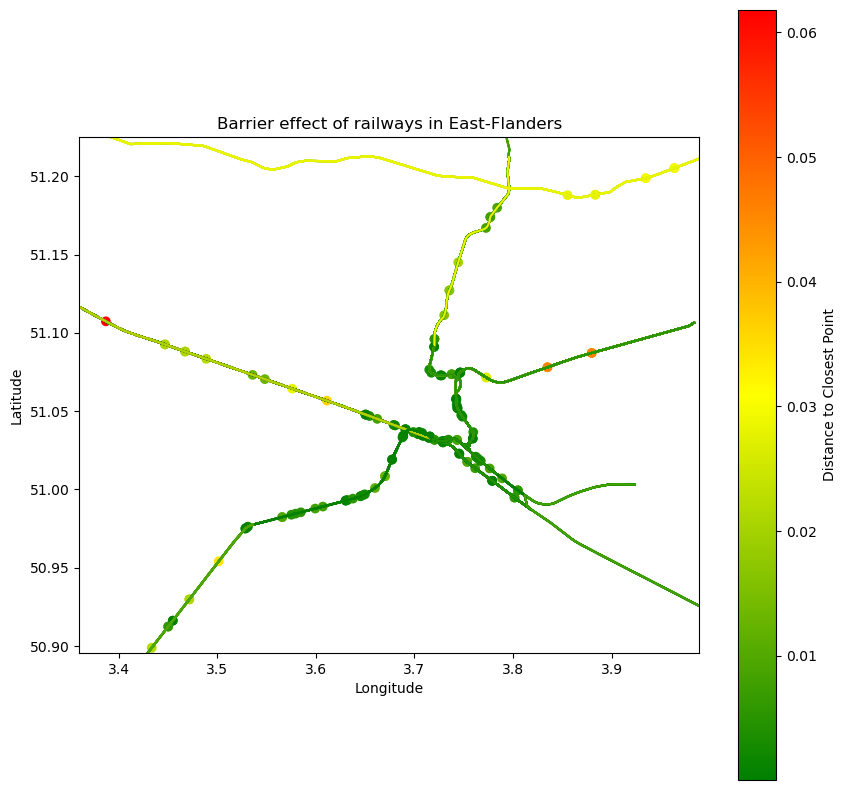

In [29]:
# Explode the rr_crossings data to create a Point for each railway crossing
rr_crossings = rr_crossings.explode()

# Get the coordinates of each Point
coords = [point.coords[0] for point in rr_crossings.geometry]

# Create a Point for each coordinate
points = [Point(x, y) for x, y in coords]

# Define a function to calculate the distance from a point to the closest point in a list of points
def point_min_distance(point, points):
    distances = [point.distance(other) for other in points]
    distances = [distance for distance in distances if distance != 0] # Exclude distance to self
    return min(distances)

# Calculate the distance from each point to the closest other point
distances = [point_min_distance(point, points) for point in points]

# Map the distances to a color scale
cmap = LinearSegmentedColormap.from_list('distance', ['green', 'yellow', 'red'])
norm = plt.Normalize(vmin=min(distances), vmax=max(distances))
colors = [cmap(norm(distance)) for distance in distances]

# Plot the rr_crossings GeoDataFrame using the colors
fig, ax = plt.subplots(figsize=(10,10))
bounds = gent_cycle_network.total_bounds
ax = rr_crossings.plot(color=colors, ax=ax)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Distance to Closest Point')

# Loop over each LineString in the railways GeoDataFrame
for line in railways.geometry:
    # Loop over each point in the points list
    for point, color in zip(points, colors):
        # If the point is within a certain distance of the line, plot the line in the color of the point
        if line.distance(point) < 0.06:
            railways[railways.geometry==line].plot(color=color, ax=ax)

# Set labels and limits
ax.set_title(f"Barrier effect of railways in East-Flanders")
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude') 
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Show the plot
plt.show()
